In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import sys
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix

In [170]:

import os
train_dir = os.path.join('F:\OneDrive - Shahjalal University of Science and Technology\Windows\Desktop\ML assignments', 'train')
val_dir = os.path.join('F:\OneDrive - Shahjalal University of Science and Technology\Windows\Desktop\ML assignments', 'val')
test_dir = os.path.join('F:\OneDrive - Shahjalal University of Science and Technology\Windows\Desktop\ML assignments', 'test')

In [171]:
img_height = 128
img_width = 128
batch_size = 32

In [172]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
   
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
   
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
   
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [173]:
train_ds.class_names

['NORMAL', 'PNEUMONIA']

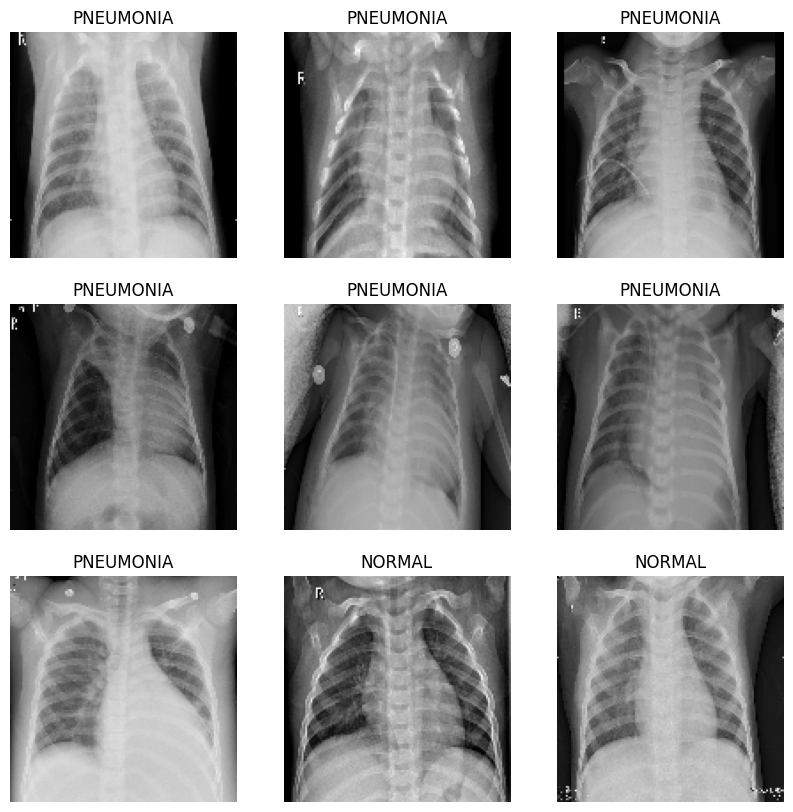

In [174]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(np.squeeze(images[i].numpy().astype("uint8")))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

In [175]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [176]:
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(160, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(160, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(160, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [177]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [178]:
epochs = 10

In [179]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10


163/163 [==============================] - 261s 2s/step - loss: 0.3193 - accuracy: 0.8698 - val_loss: 0.5631 - val_accuracy: 0.7500
Epoch 2/10
163/163 [==============================] - 237s 1s/step - loss: 0.1251 - accuracy: 0.9536 - val_loss: 0.1182 - val_accuracy: 0.9375
Epoch 3/10
163/163 [==============================] - 207s 1s/step - loss: 0.0889 - accuracy: 0.9670 - val_loss: 0.4884 - val_accuracy: 0.8125
Epoch 4/10
163/163 [==============================] - 214s 1s/step - loss: 0.0812 - accuracy: 0.9688 - val_loss: 0.2530 - val_accuracy: 0.8750
Epoch 5/10
163/163 [==============================] - 199s 1s/step - loss: 0.0626 - accuracy: 0.9772 - val_loss: 0.6114 - val_accuracy: 0.7500
Epoch 6/10
163/163 [==============================] - 226s 1s/step - loss: 0.0500 - accuracy: 0.9833 - val_loss: 1.2742 - val_accuracy: 0.6250
Epoch 7/10
163/163 [==============================] - 236s 1s/step - loss: 0.0395 - accuracy: 0.9862 - val_loss: 1.6105 - val_accuracy: 0.6250
Epoch 8/10

20/20 [==============================] - 5s 264ms/step
Test Loss: 1.6283
Test Accuracy: 0.7756
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.43      0.59       234
           1       0.74      0.98      0.85       390

    accuracy                           0.78       624
   macro avg       0.84      0.71      0.72       624
weighted avg       0.81      0.78      0.75       624



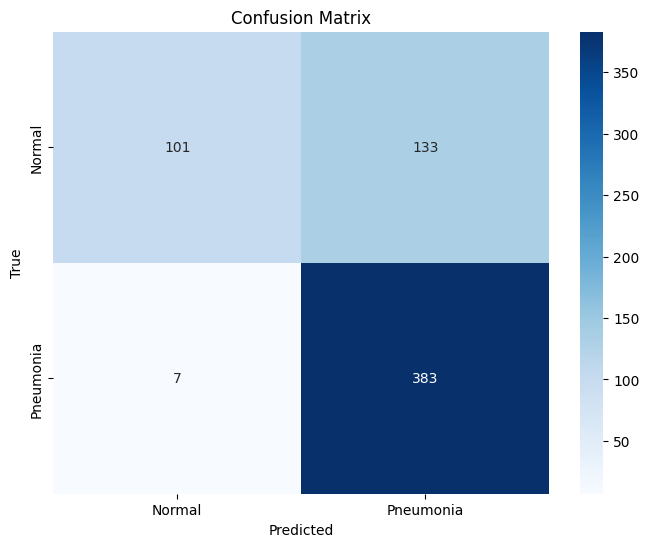

In [180]:



test_loss, test_accuracy = model.evaluate(test_ds)


predictions = model.predict(test_ds)


predicted_labels = np.argmax(predictions, axis=1)


true_labels = np.concatenate([y for x, y in test_ds], axis=0)


print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

print("Classification Report:\n", classification_report(true_labels, predicted_labels))


conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

1/1 [==============================] - 0s 29ms/step
Pneumonia


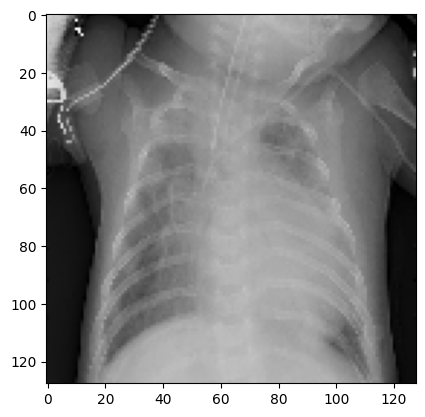

In [196]:

test_image_path = r'F:\OneDrive - Shahjalal University of Science and Technology\Windows\Desktop\ML assignments\test\PNEUMONIA\person1_virus_6.jpeg'
test_image = tf.keras.utils.load_img(test_image_path, target_size=(img_height, img_width))


plt.imshow(test_image)

test_image = tf.keras.utils.img_to_array(test_image)


test_image = np.expand_dims(test_image, axis=0)

test_image /= 255.0

result = model.predict(test_image)
class_probabilities = result[0]

if class_probabilities[1] <= 0.5000:
    print("Normal")
else:
    print("Pneumonia")

1/1 [==============================] - 0s 29ms/step
Normal


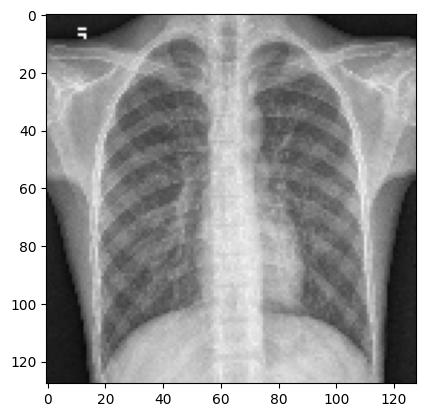

In [197]:

test_image_path = r'F:\OneDrive - Shahjalal University of Science and Technology\Windows\Desktop\ML assignments\test\NORMAL\IM-0005-0001.jpeg'
test_image = tf.keras.utils.load_img(test_image_path, target_size=(img_height, img_width))


plt.imshow(test_image)

test_image = tf.keras.utils.img_to_array(test_image)


test_image = np.expand_dims(test_image, axis=0)

test_image /= 255.0

result = model.predict(test_image)
class_probabilities = result[0]

if class_probabilities[0] <= 0.5000:
    print("Normal")
else:
    print("Pneumonia")